author: Flavio Lichtenstein  
data update:  2019/02/07  
data created: 2016/07/20  
local: Molecular Biology/Inovation & CENTD - Butantan Institute  

### Lecture 09 - graph theory - hands on

### There are many packages to work with graphs: igraph


[igraph](https://igraph.org/python/doc/tutorial/tutorial.html)  
[igraph - amazon](https://rstudio-pubs-static.s3.amazonaws.com/74248_3bd99f966ed94a91b36d39d8f21e3dc3.html)  


In [51]:
suppressWarnings(library(igraph))

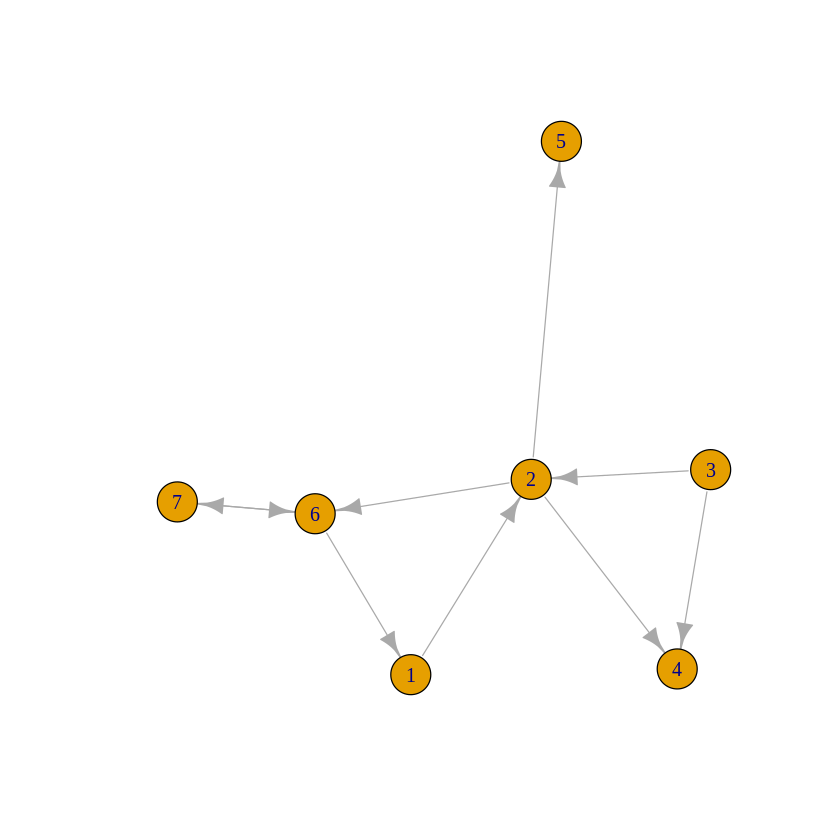

In [52]:
#-- build a graph manually

edges <- c(1,2, 3,2, 2,4, 2,5, 2,6, 6,1, 3,4, 7,6, 6,7)
g<-graph(edges, n=max(edges), directed=TRUE)
plot(g)

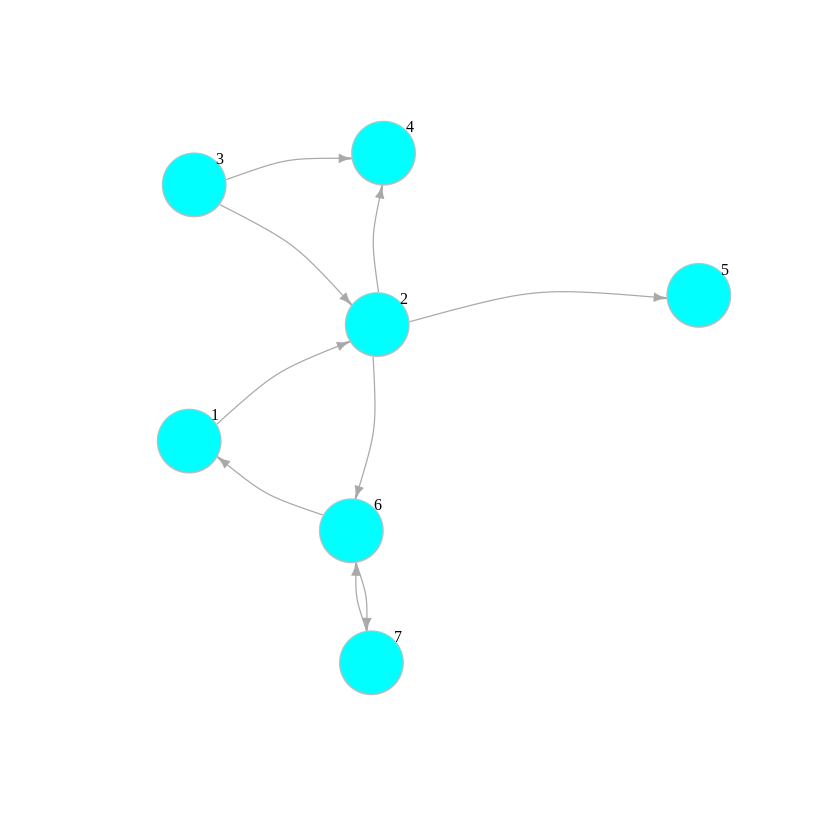

In [53]:
plot(g, edge.arrow.size=.5, vertex.color="cyan", vertex.size=25, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.8, vertex.label.dist=2, edge.curved=0.2) 

In [54]:
id = tkplot(g, edge.arrow.size=.5, vertex.color="cyan", vertex.size=25, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.8, vertex.label.dist=2, edge.curved=0.2)

In [55]:
tk_close(id)

ERROR: Error in eval(parse(text = cmd), .tkplot.env): object 'tkp.5' not found


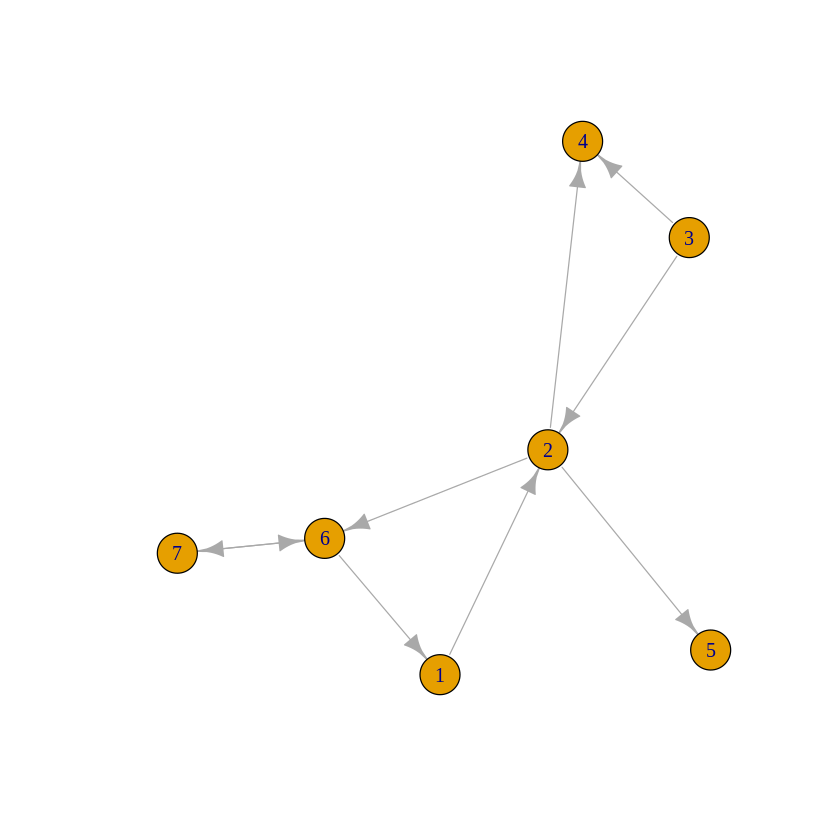

In [56]:
tkid <- tkplot(g) #tkid is the id of the tkplot that will open

l <- tkplot.getcoords(tkid) # grab the coordinates from tkplot
tk_close(tkid, window.close = T)

plot(g, layout=l)

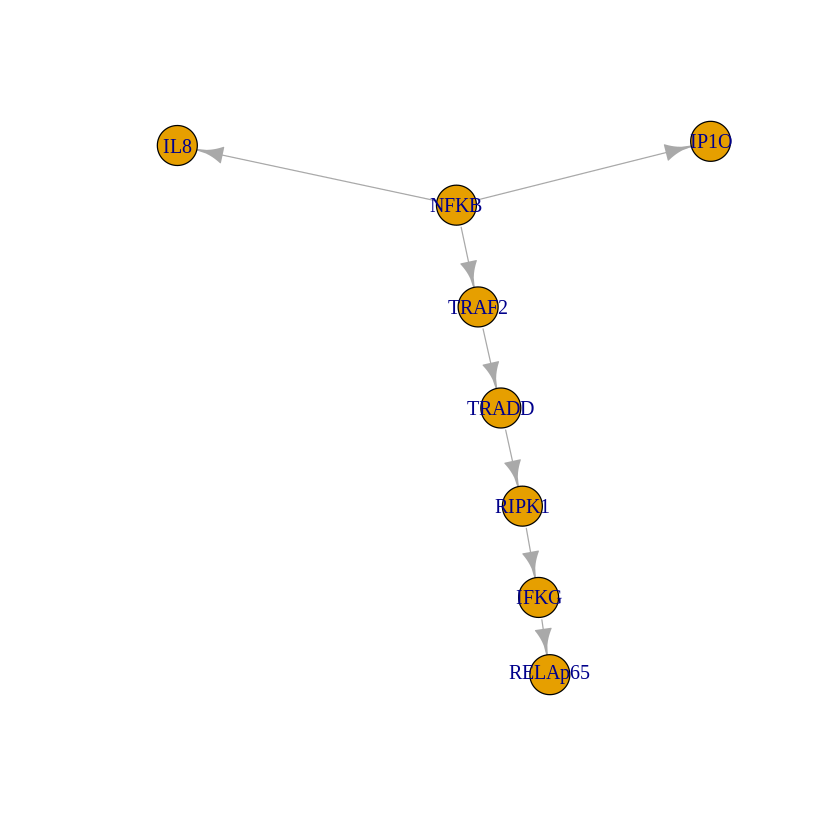

In [57]:
edges <- c("NFKB", "IP1O", "NFKB", "IL8", "NFKB", "TRAF2", "TRAF2", "TRADD", "TRADD", "RIPK1", 
               "RIPK1", "IFKG", "IFKG", "RELAp65")
g<-graph(edges, directed=TRUE)
plot(g)

In [58]:
id = tkplot(g)

In [18]:
g <- make_star(12, center=12) %u% make_ring(9, directed=TRUE)
E(g)$width <- sample(1:12, ecount(g), replace=TRUE)
lay <- layout_nicely(g)

id <- tkplot(g, layout=lay)

want.save = F

if (want.save) {
    canvas <- tk_canvas(id)
    tkpostscript(canvas, file="/tmp/output.eps")
}


In [59]:
tk_close(id)

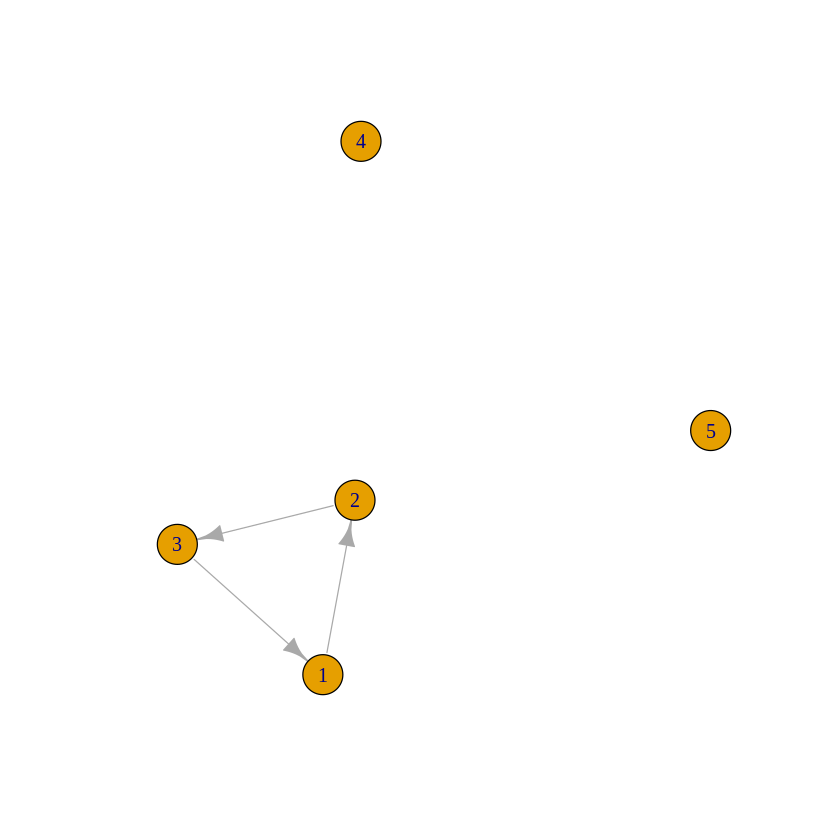

In [60]:
#-- from http://kateto.net/netscix2016
g2 <- graph( edges=c(1,2, 2,3, 3, 1), n=5 )
plot(g2) 

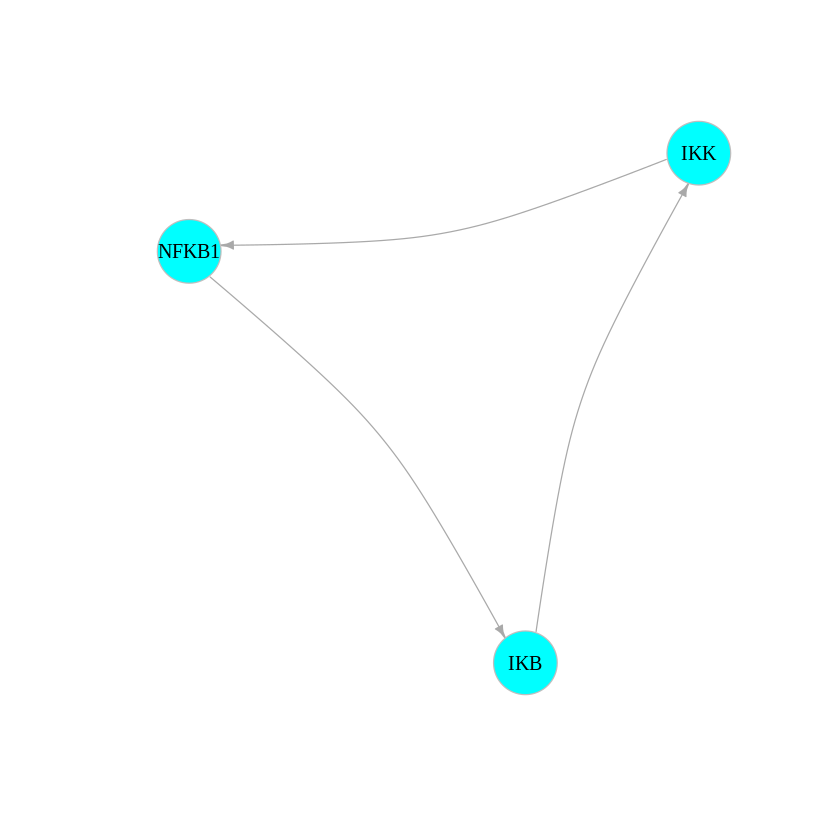

In [61]:
# When the edge list has vertex names, the number of nodes is not needed
g3 <- graph( c("NFKB1", "IKB", "IKB", "IKK", "IKK", "NFKB1")) # named vertices

plot(g3, edge.arrow.size=.5, vertex.color="cyan", vertex.size=25, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=1, vertex.label.dist=0, edge.curved=0.2) 

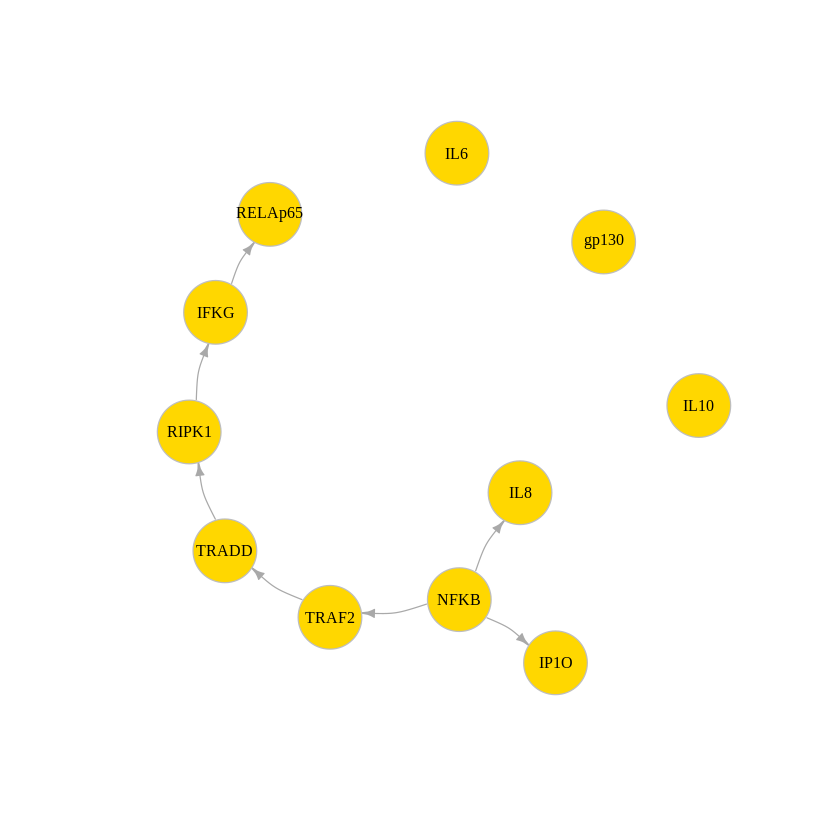

In [62]:
g4 <- graph( c("NFKB", "IP1O", "NFKB", "IL8", "NFKB", "TRAF2", "TRAF2", "TRADD", "TRADD", "RIPK1", 
               "RIPK1", "IFKG", "IFKG", "RELAp65"), 

             isolates=c("IL6", "IL10", "gp130") )  

# In named graphs we can specify isolates by providing a list of their names.

plot(g4, edge.arrow.size=.5, vertex.color="gold", vertex.size=25, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.8, vertex.label.dist=0, edge.curved=0.2) 

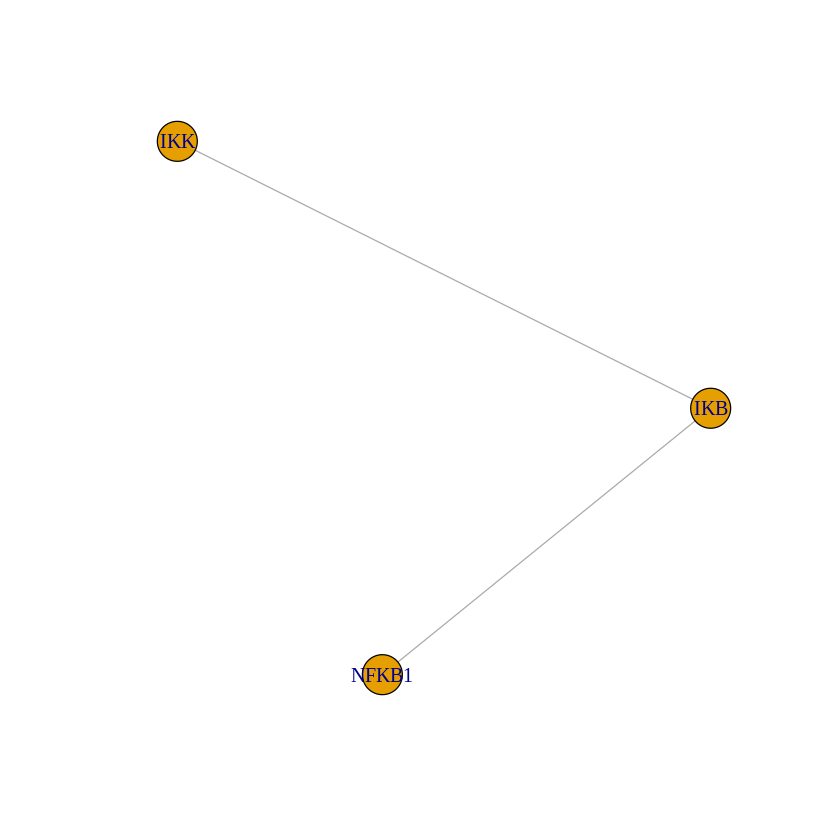

In [63]:
#-- Small graphs can also be generated with a description of this kind: 
#     - for undirected tie, +- or -+ 
#     - for directed ties pointing left & right, ++ for a symmetric tie, and “:” for sets of vertices.

plot(graph_from_literal(NFKB1-IKB, IKB-IKK)) # the number of dashes doesn't matter

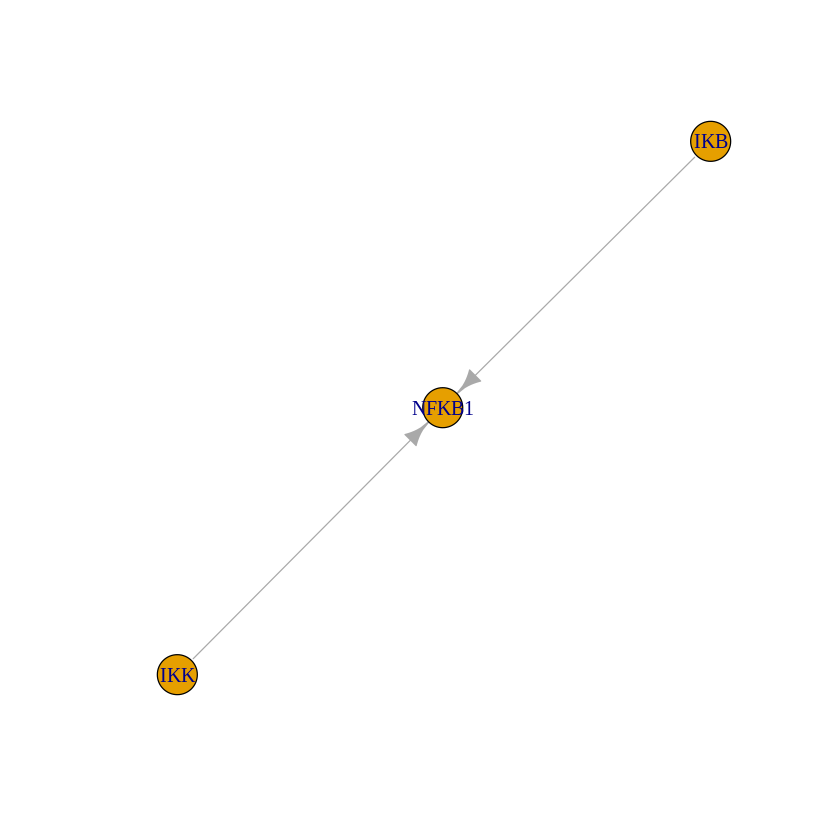

In [64]:
plot(graph_from_literal(IKB--+NFKB1, NFKB1+--IKK))

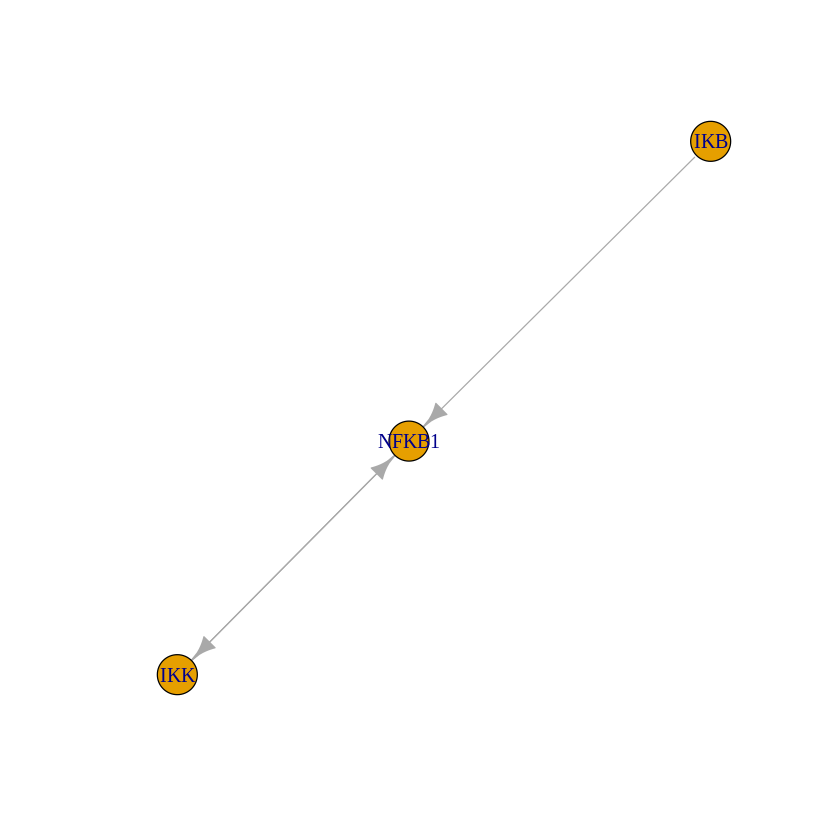

In [65]:
plot(graph_from_literal(IKB--+NFKB1, NFKB1+--+IKK)) 

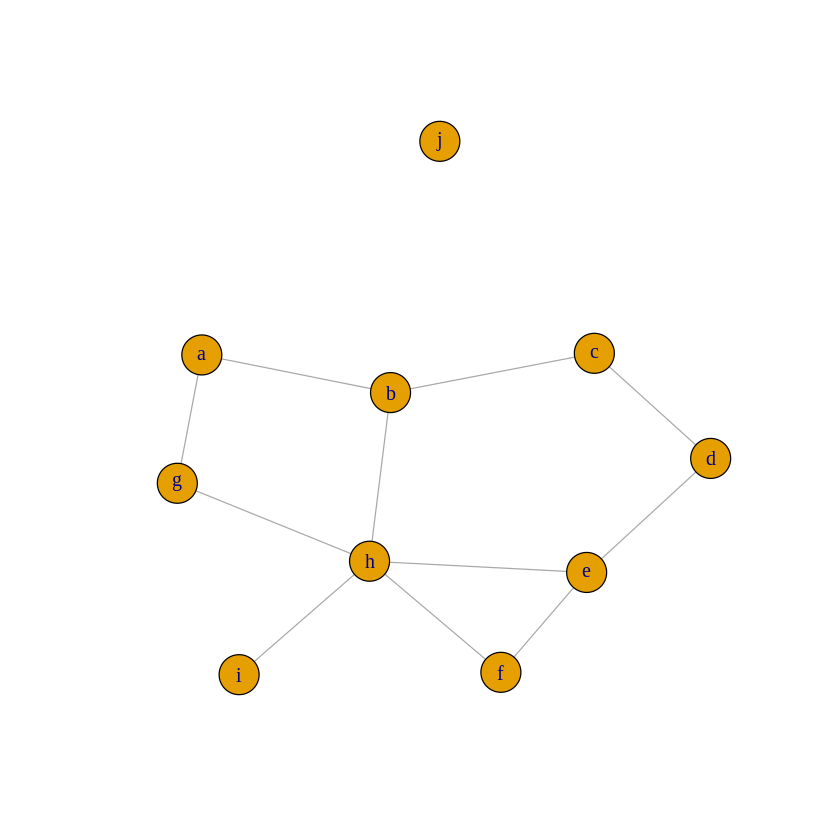

In [66]:
gl <- graph_from_literal(a-b-c-d-e-f, a-g-h-b, h-e:f:i, j)

plot(gl)

### Reading from a PPI table

PPI = protein protein interaction table

[string-db](https://string-db.org/cgi/input.pl)

Suppose you have a table obtained from an experiment  
  
Columns:  
  * num - numeration  
  * netobj_from = network object from  
  * objtype_from = object type from (what kind of molecule)  
  * netobj_to = network object to  
  * objtype_to = object type to (what kind of molecule)  
  * effect = activation or ihhibition
  * mechanims = way of interaction  
  
  
in this first moment we are interested in netobj_from and netobj_to  
and we must transform these columns in a sequencial data array  

lets open the file that is in the "data" directory  

In [102]:
filename = "data/Activation of TNF-alpha-dependent pro-tumoral effect in colorectal cancer g1 h6 h12 interactions.csv"
file.exists(filename)

df = read.table(filename, sep="\t", header = T)


[1] TRUE

In [103]:
head(df, 15)

num,netobj_from,objtype_from,netobj_to,objtype_to,effect,mechanism
1,NIK(MAP3K14),Protein kinase,IKK-beta,Protein kinase,Activation,Phosphorylation
2,IKK-alpha,Protein kinase,I-kB,Generic binding protein,Inhibition,Phosphorylation
3,TNF-R1,Generic receptor,p38 MAPK,Protein kinase,Activation,Unspecified
4,TNF-R1,Generic receptor,VCAM1,Generic receptor,Activation,Influence on expression
5,IKK-gamma,Generic binding protein,IKK-alpha,Protein kinase,Activation,Binding
6,I-kB,Generic binding protein,RelA (p65 NF-kB subunit),Transcription factor,Inhibition,Binding
7,TAK1(MAP3K7),Protein kinase,IKK-alpha,Protein kinase,Activation,Binding
8,MEK1/2,Protein kinase,ERK1/2,Protein kinase,Activation,Phosphorylation
9,IKK-gamma,Generic binding protein,IKK-beta,Protein kinase,Activation,Binding
10,I-kB,Generic binding protein,NF-kB1 (p50),Transcription factor,Inhibition,Binding


In [104]:
df[1,]

num,netobj_from,objtype_from,netobj_to,objtype_to,effect,mechanism
1,NIK(MAP3K14),Protein kinase,IKK-beta,Protein kinase,Activation,Phosphorylation


***be careful when a column is a factor***  

use "paste" to transform in a character vector.

In [105]:
df[1,2]

[1] NIK(MAP3K14)
26 Levels: ABCC4 ALDR Axin c-Raf-1 G-protein alpha-s GRB2 H-Ras ... VCAM1

In [106]:
df[,2] = paste(df[,2])
df[,4] = paste(df[,4])

#-- now it is a character vector
df[1,2]

[1] "NIK(MAP3K14)"

### Creating an array to easily build a graph

In [107]:
arr = c()
for (i in 1:nrow(df)) {
    # arr = c(arr, c(df[i, "netobj_from"], df[i, "netobj_to"]) )
    arr = c(arr, c(df[i, 2], df[i, 4]) )
}

cat(arr)
cat("\n\n")
cat(nrow(df))
cat("\n")
cat(length(arr))

NIK(MAP3K14) IKK-beta IKK-alpha I-kB TNF-R1 p38 MAPK TNF-R1 VCAM1 IKK-gamma IKK-alpha I-kB RelA (p65 NF-kB subunit) TAK1(MAP3K7) IKK-alpha MEK1/2 ERK1/2 IKK-gamma IKK-beta I-kB NF-kB1 (p50) c-Raf-1 MEK1/2 ALDR Glutathione-HNE + NAD(P)H = NADP(+) + 1,4-Dihydroxy-3-(GSH)-nonane PGE2R2 G-protein alpha-s MADD GRB2 TRAF2 TAK1(MAP3K7) G-protein alpha-s Axin VCAM1 alpha-4/beta-1 integrin H-Ras c-Raf-1 TRAF2 NIK(MAP3K14) GRB2 SOS SOS H-Ras TRADD TRAF2 TRADD RIPK1 TNF-R1 TRADD TAK1(MAP3K7) IKK-beta Axin Beta-catenin TNF-alpha TNF-R1 TNF-R1 MADD TNF-R1 GRB2 TRAF2 RIPK1 NIK(MAP3K14) IKK-alpha NF-kB c-IAP2 RIPK1 IKK-gamma NF-kB TRAF1 NF-kB TRAF2 NF-kB ICAM1 NF-kB COX-2 (PTGS2) SOS K-RAS K-RAS c-Raf-1 NF-kB IP10 NF-kB IL-6 NF-kB GRO-1 NF-kB IL-8 NF-kB CCL2 ABCC4 <intracellular> Prostaglandin E2 = <extracellular region> Prostaglandin E2 IKK-beta I-kB Prostaglandin E2 extracellular region PGE2R2

47
94

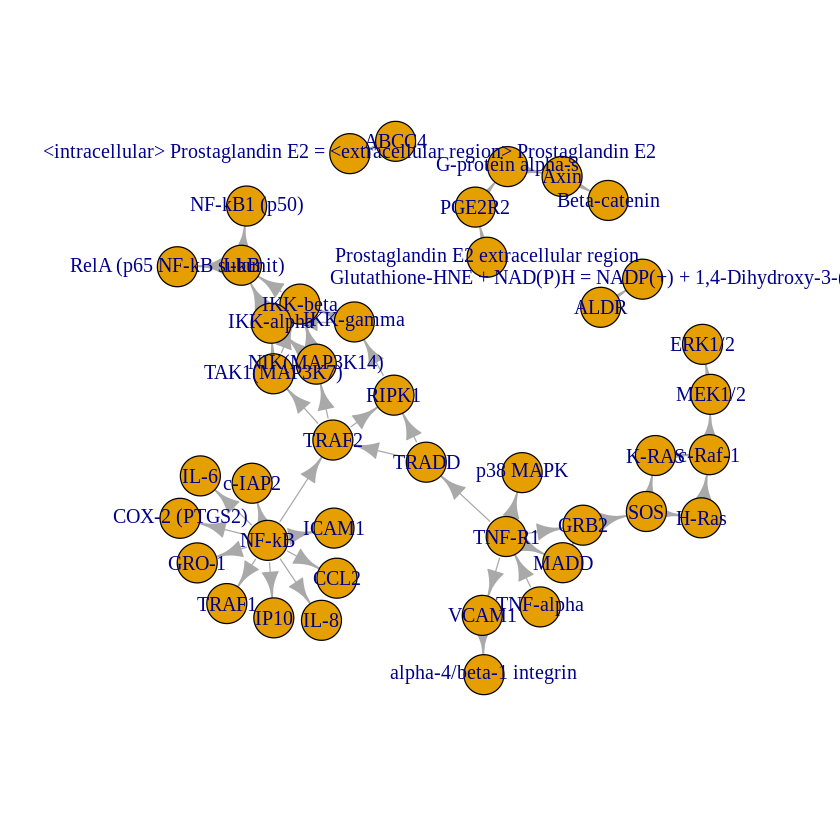

In [108]:
g <- graph(arr)
plot(g)

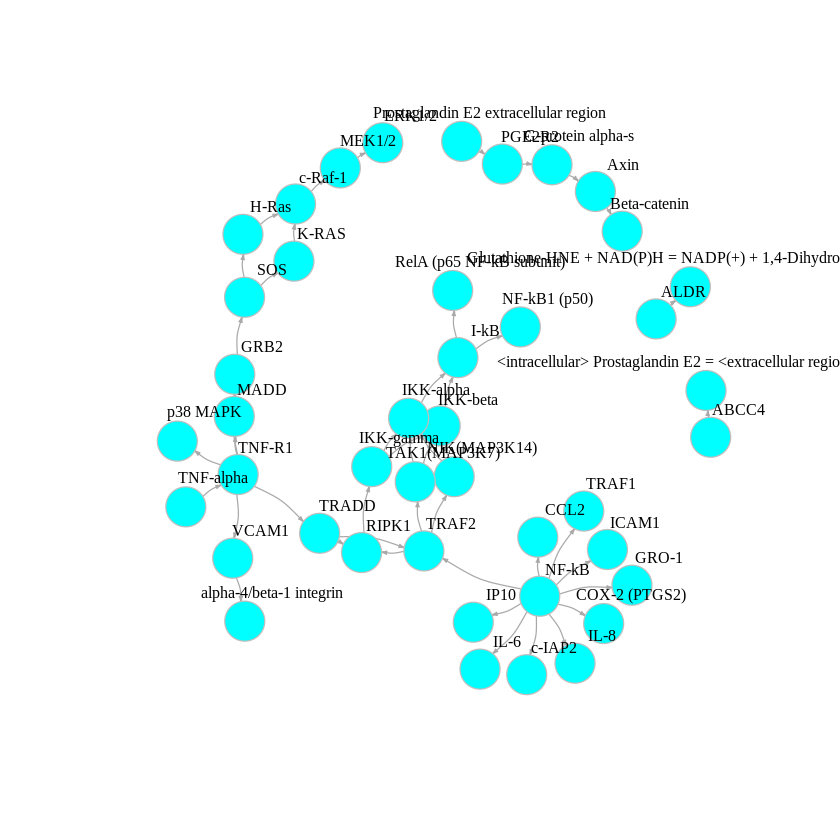

In [109]:
plot(g, edge.arrow.size=.2, vertex.color="cyan", vertex.size=15, 
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.8, vertex.label.dist=2, edge.curved=0.2) 

### Edges == E()

In [110]:
E(g)

+ 47/47 edges from fde0741 (vertex names):
 [1] NIK(MAP3K14)->IKK-beta                
 [2] IKK-alpha   ->I-kB                    
 [3] TNF-R1      ->p38 MAPK                
 [4] TNF-R1      ->VCAM1                   
 [5] IKK-gamma   ->IKK-alpha               
 [6] I-kB        ->RelA (p65 NF-kB subunit)
 [7] TAK1(MAP3K7)->IKK-alpha               
 [8] MEK1/2      ->ERK1/2                  
 [9] IKK-gamma   ->IKK-beta                
[10] I-kB        ->NF-kB1 (p50)            
+ ... omitted several edges

### Vertices = V()

In [111]:
V(g)

+ 43/43 vertices, named, from fde0741:
 [1] NIK(MAP3K14)                                                              
 [2] IKK-beta                                                                  
 [3] IKK-alpha                                                                 
 [4] I-kB                                                                      
 [5] TNF-R1                                                                    
 [6] p38 MAPK                                                                  
 [7] VCAM1                                                                     
 [8] IKK-gamma                                                                 
 [9] RelA (p65 NF-kB subunit)                                                  
[10] TAK1(MAP3K7)                                                              
+ ... omitted several vertices

### Network Matrix table

In [112]:
g[1:10, 1:6]

10 x 6 sparse Matrix of class "dgCMatrix"
                         NIK(MAP3K14) IKK-beta IKK-alpha I-kB TNF-R1 p38 MAPK
NIK(MAP3K14)                        .        1         1    .      .        .
IKK-beta                            .        .         .    1      .        .
IKK-alpha                           .        .         .    1      .        .
I-kB                                .        .         .    .      .        .
TNF-R1                              .        .         .    .      .        1
p38 MAPK                            .        .         .    .      .        .
VCAM1                               .        .         .    .      .        .
IKK-gamma                           .        1         1    .      .        .
RelA (p65 NF-kB subunit)            .        .         .    .      .        .
TAK1(MAP3K7)                        .        1         1    .      .        .

In [113]:
edge_attr(g)

list()

In [114]:
length(edge_attr(g))

[1] 0

In [115]:
vertex_attr(g)

$name
 [1] "NIK(MAP3K14)"                                                              
 [2] "IKK-beta"                                                                  
 [3] "IKK-alpha"                                                                 
 [4] "I-kB"                                                                      
 [5] "TNF-R1"                                                                    
 [6] "p38 MAPK"                                                                  
 [7] "VCAM1"                                                                     
 [8] "IKK-gamma"                                                                 
 [9] "RelA (p65 NF-kB subunit)"                                                  
[10] "TAK1(MAP3K7)"                                                              
[11] "MEK1/2"                                                                    
[12] "ERK1/2"                                                                    
[13] "NF-kB1 (p50)"                                                              
[14] "c-Raf-1"                                                                   
[15] "ALDR"                                                                      
[16] "Glutathione-HNE + NAD(P)H = NADP(+) + 1,4-Dihydroxy-3-(GSH)-nonane"        
[17] "PGE2R2"                                                                    
[18] "G-protein alpha-s"                                                         
[19] "MADD"                                                                      
[20] "GRB2"                                                                      
[21] "TRAF2"                                                                     
[22] "Axin"                                                                      
[23] "alpha-4/beta-1 integrin"                                                   
[24] "H-Ras"                                                                     
[25] "SOS"                                                                       
[26] "TRADD"                                                                     
[27] "RIPK1"                                                                     
[28] "Beta-catenin"                                                              
[29] "TNF-alpha"                                                                 
[30] "NF-kB"                                                                     
[31] "c-IAP2"                                                                    
[32] "TRAF1"                                                                     
[33] "ICAM1"                                                                     
[34] "COX-2 (PTGS2)"                                                             
[35] "K-RAS"                                                                     
[36] "IP10"                                                                      
[37] "IL-6"                                                                      
[38] "GRO-1"                                                                     
[39] "IL-8"                                                                      
[40] "CCL2"                                                                      
[41] "ABCC4"                                                                     
[42] "<intracellular> Prostaglandin E2 = <extracellular region> Prostaglandin E2"
[43] "Prostaglandin E2 extracellular region"

In [116]:
length(vertex_attr(g))

[1] 1

### Graph properties

[igraph manual](https://igraph.org/r/doc/)

In [117]:
betweenness(g)

NIK(MAP3K14) 
                                                                      10.0 
                                                                  IKK-beta 
                                                                      13.5 
                                                                 IKK-alpha 
                                                                      13.5 
                                                                      I-kB 
                                                                      22.0 
                                                                    TNF-R1 
                                                                      22.0 
                                                                  p38 MAPK 
                                                                       0.0 
                                                                     VCAM1 
                                                                       2.0 
                                                                 IKK-gamma 
                                                                      10.0 
                                                  RelA (p65 NF-kB subunit) 
                                                                       0.0 
                                                              TAK1(MAP3K7) 
                                                                      10.0 
                                                                    MEK1/2 
                                                                       8.0 
                                                                    ERK1/2 
                                                                       0.0 
                                                              NF-kB1 (p50) 
                                                                       0.0 
                                                                   c-Raf-1 
                                                                      14.0 
                                                                      ALDR 
                                                                       0.0 
        Glutathione-HNE + NAD(P)H = NADP(+) + 1,4-Dihydroxy-3-(GSH)-nonane 
                                                                       0.0 
                                                                    PGE2R2 
                                                                       3.0 
                                                         G-protein alpha-s 
                                                                       4.0 
                                                                      MADD 
                                                                       0.0 
                                                                      GRB2 
                                                                      18.0 
                                                                     TRAF2 
                                                                      25.0 
                                                                      Axin 
                                                                       3.0 
                                                   alpha-4/beta-1 integrin 
                                                                       0.0 
                                                                     H-Ras 
                                                                       7.5 
                                                                       SOS 
                                                                      20.0 
                                                                     TRADD 
                                                                      20.0 
                                                                     RIPK1 
                                  

In [119]:
hub.score(g)

$vector
                                                              NIK(MAP3K14) 
                                                              0.000000e+00 
                                                                  IKK-beta 
                                                              2.594558e-17 
                                                                 IKK-alpha 
                                                              2.594558e-17 
                                                                      I-kB 
                                                              2.594558e-17 
                                                                    TNF-R1 
                                                              0.000000e+00 
                                                                  p38 MAPK 
                                                              1.745337e-17 
                                                                     VCAM1 
                                                              0.000000e+00 
                                                                 IKK-gamma 
                                                              0.000000e+00 
                                                  RelA (p65 NF-kB subunit) 
                                                              1.745337e-17 
                                                              TAK1(MAP3K7) 
                                                              0.000000e+00 
                                                                    MEK1/2 
                                                              0.000000e+00 
                                                                    ERK1/2 
                                                              1.745337e-17 
                                                              NF-kB1 (p50) 
                                                              1.745337e-17 
                                                                   c-Raf-1 
                                                              1.151357e-17 
                                                                      ALDR 
                                                              0.000000e+00 
        Glutathione-HNE + NAD(P)H = NADP(+) + 1,4-Dihydroxy-3-(GSH)-nonane 
                                                              1.745337e-17 
                                                                    PGE2R2 
                                                              0.000000e+00 
                                                         G-protein alpha-s 
                                                              0.000000e+00 
                                                                      MADD 
                                                              0.000000e+00 
                                                                      GRB2 
                                                              1.151357e-17 
                                                                     TRAF2 
                                                              1.757647e-02 
                                                                      Axin 
                                                              0.000000e+00 
                                                   alpha-4/beta-1 integrin 
                                                              1.745337e-17 
                                                                     H-Ras 
                                                              1.297279e-17 
                                                                       SOS 
                                                              5.538145e-17 
                                                                     TRADD 
                                                              1.252365e-01 
                                        

In [120]:
get.adjlist(g)

$`NIK(MAP3K14)`
+ 3/43 vertices, named, from fde0741:
[1] IKK-beta  IKK-alpha TRAF2    

$`IKK-beta`
+ 4/43 vertices, named, from fde0741:
[1] NIK(MAP3K14) I-kB         IKK-gamma    TAK1(MAP3K7)

$`IKK-alpha`
+ 4/43 vertices, named, from fde0741:
[1] NIK(MAP3K14) I-kB         IKK-gamma    TAK1(MAP3K7)

$`I-kB`
+ 4/43 vertices, named, from fde0741:
[1] IKK-beta                 IKK-alpha                RelA (p65 NF-kB subunit)
[4] NF-kB1 (p50)            

$`TNF-R1`
+ 6/43 vertices, named, from fde0741:
[1] p38 MAPK  VCAM1     MADD      GRB2      TRADD     TNF-alpha

$`p38 MAPK`
+ 1/43 vertex, named, from fde0741:
[1] TNF-R1

$VCAM1
+ 2/43 vertices, named, from fde0741:
[1] TNF-R1                  alpha-4/beta-1 integrin

$`IKK-gamma`
+ 3/43 vertices, named, from fde0741:
[1] IKK-beta  IKK-alpha RIPK1    

$`RelA (p65 NF-kB subunit)`
+ 1/43 vertex, named, from fde0741:
[1] I-kB

$`TAK1(MAP3K7)`
+ 3/43 vertices, named, from fde0741:
[1] IKK-beta  IKK-alpha TRAF2    

$`MEK1/2`
+ 2/43 vert

### Artificial graphs - simulations

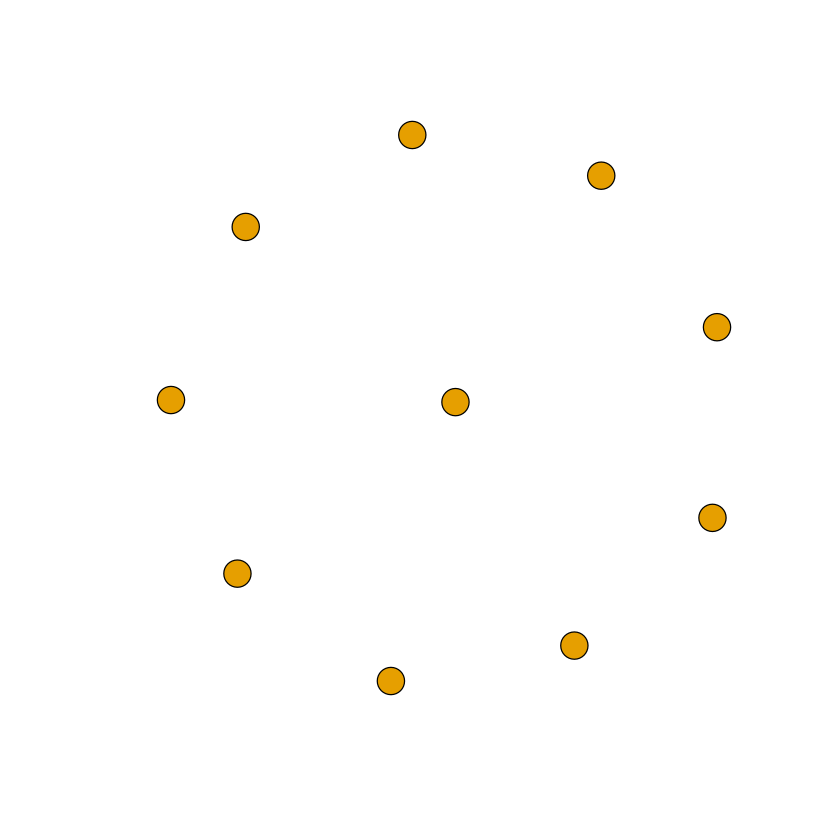

In [89]:
eg <- make_empty_graph(10)

plot(eg, vertex.size=10, vertex.label=NA)

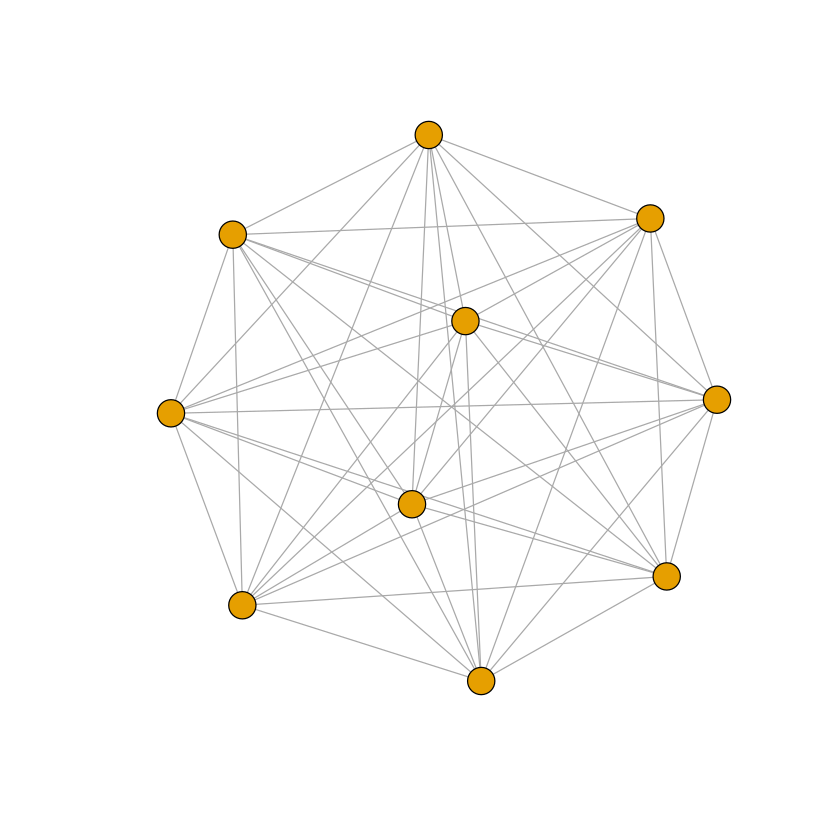

In [91]:
fg <- make_full_graph(10)

plot(fg, vertex.size=10, vertex.label=NA)

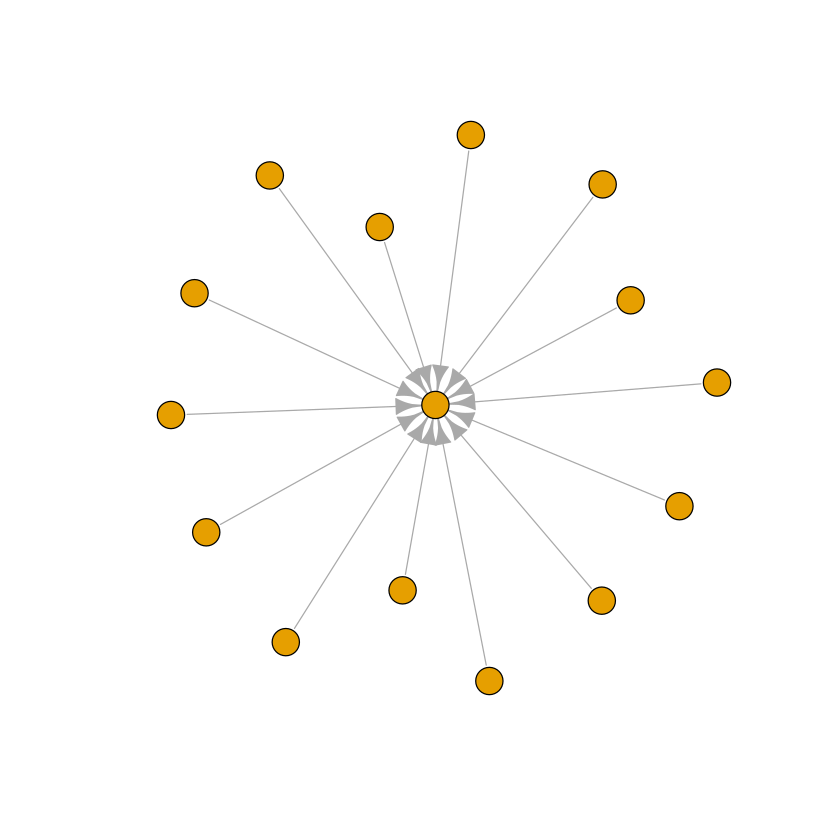

In [92]:
st <- make_star(15)

plot(st, vertex.size=10, vertex.label=NA) 

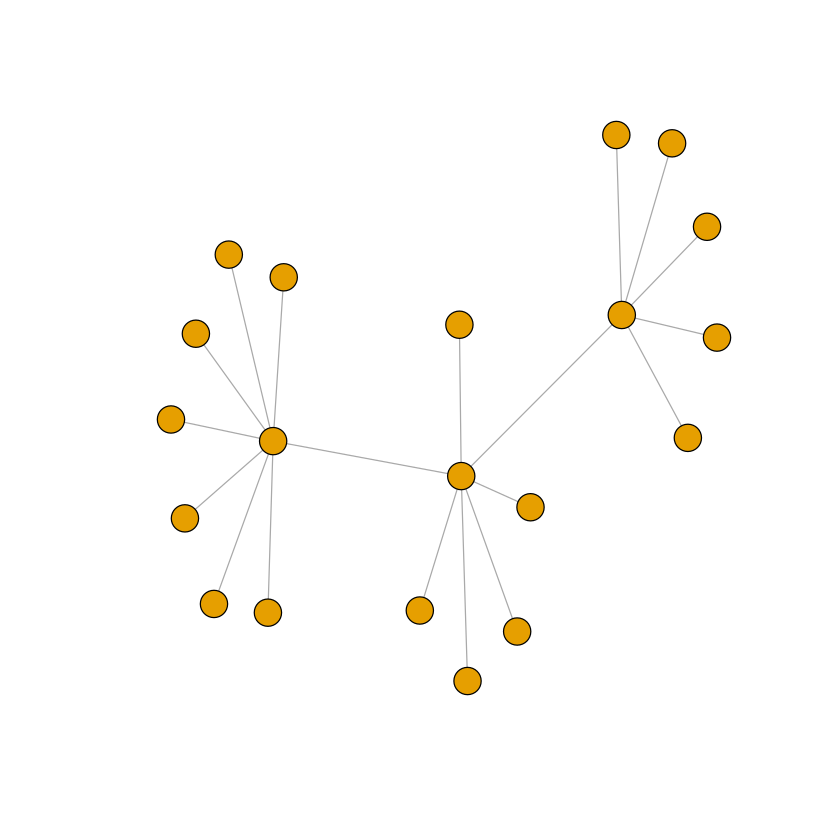

In [93]:
#-- tree graph

tr <- make_tree(20, children = 7, mode = "undirected")
plot(tr, vertex.size=10, vertex.label=NA) 

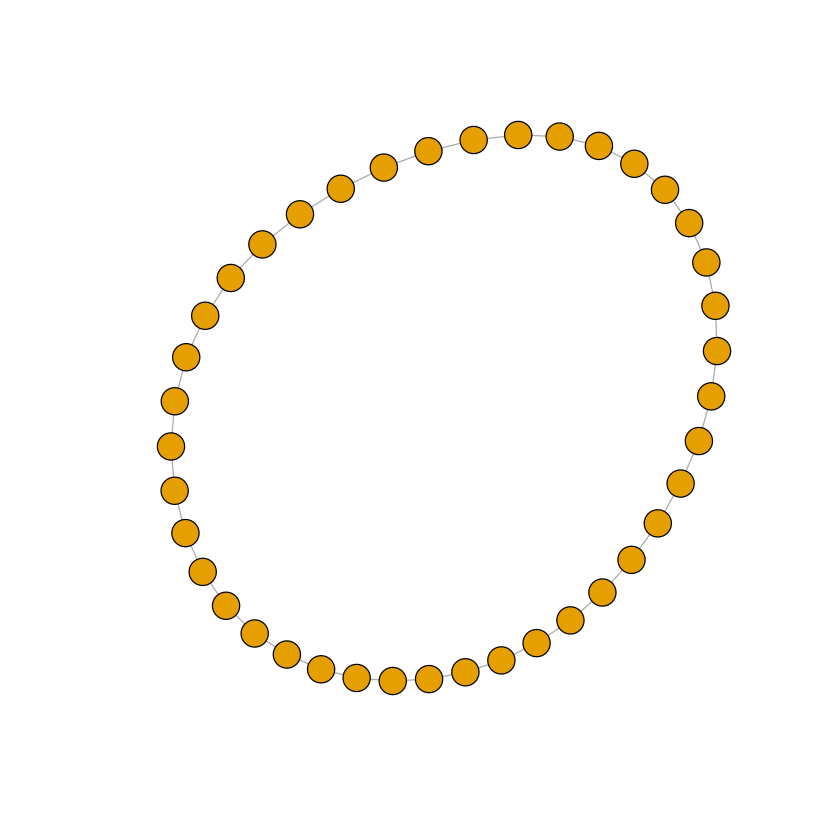

In [94]:
# ring graph
rn <- make_ring(40)
plot(rn, vertex.size=10, vertex.label=NA)

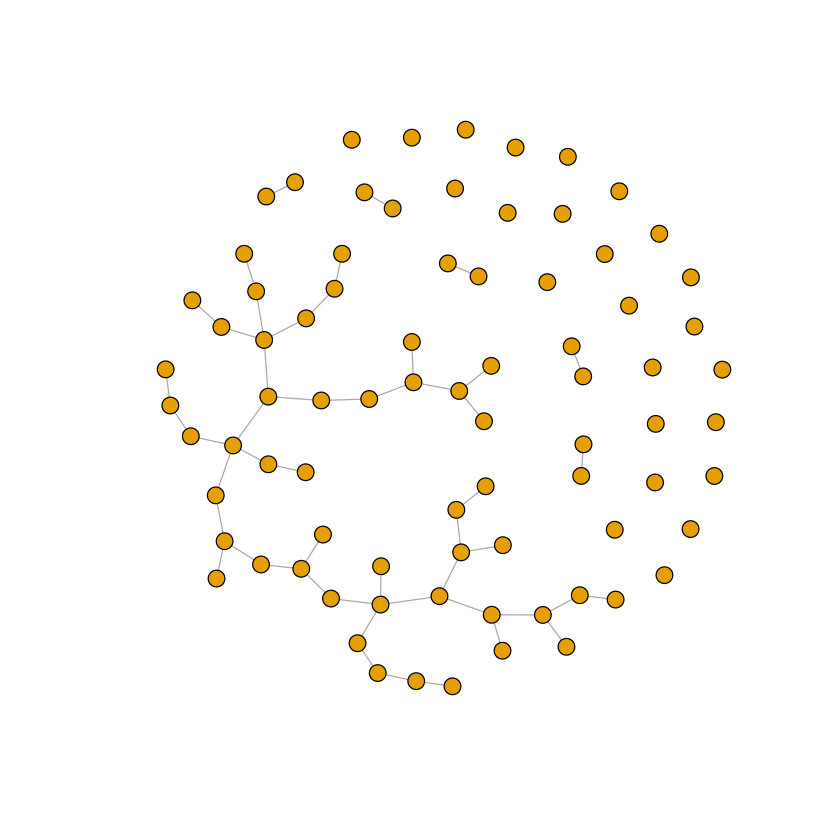

In [95]:
#-- Erdos-Renyi random graph model
#-- (‘n’ is number of nodes, ‘m’ is the number of edges).

er <- sample_gnm(n=80, m=50) 
plot(er, vertex.size=6, vertex.label=NA) 

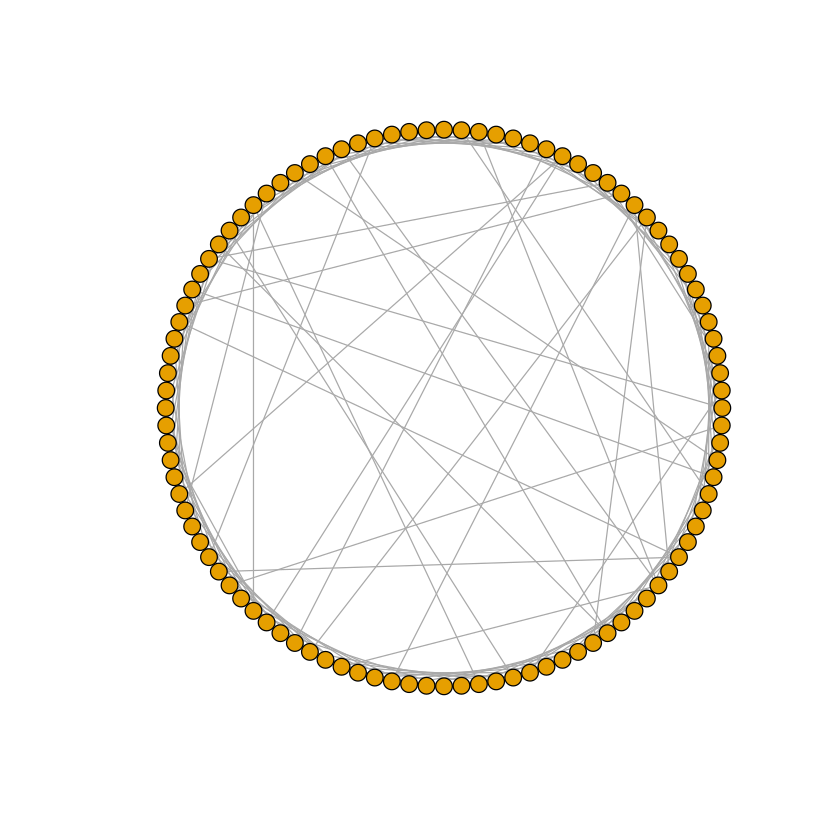

In [96]:
#-- Watts-Strogatz small-world model
#--- Creates a lattice (with dim dimensions and size nodes across dimension)
#-- and rewires edges randomly with probability p. The neighborhood in which edges are connected is nei. You can allow loops and multiple edges.

sw <- sample_smallworld(dim=2, size=10, nei=1, p=0.1)
plot(sw, vertex.size=6, vertex.label=NA, layout=layout_in_circle)

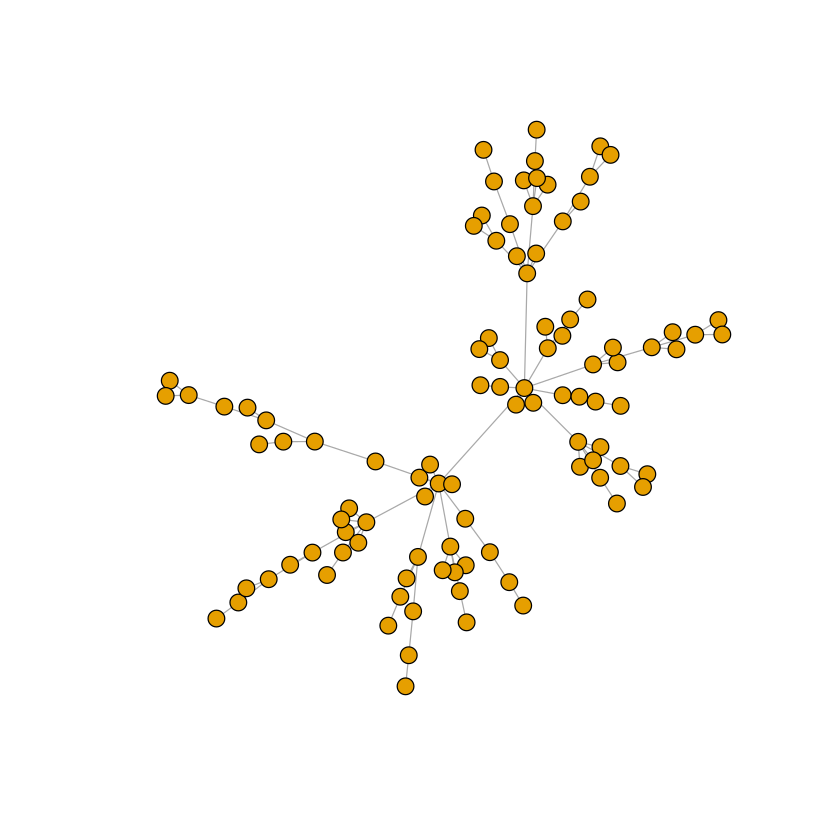

In [97]:
#-- arabasi-Albert preferential attachment model for scale-free graphs
#-- (n is number of nodes, power is the power of attachment (1 is linear); 
#--  m is the number of edges added on each time step)

ba <-  sample_pa(n=100, power=1, m=1,  directed=F)

plot(ba, vertex.size=6, vertex.label=NA)

In [99]:
#--- Dataset

nodes <- read.csv("data/netscix2016/Dataset1-Media-Example-NODES.csv", header=T, as.is=T)

links <- read.csv("data/netscix2016/Dataset1-Media-Example-EDGES.csv", header=T, as.is=T)


In [100]:
head(nodes)

id,media,media.type,type.label,audience.size
s01,NY Times,1,Newspaper,20
s02,Washington Post,1,Newspaper,25
s03,Wall Street Journal,1,Newspaper,30
s04,USA Today,1,Newspaper,32
s05,LA Times,1,Newspaper,20
s06,New York Post,1,Newspaper,50


In [101]:
head(links)

from,to,weight,type
s01,s02,10,hyperlink
s01,s02,12,hyperlink
s01,s03,22,hyperlink
s01,s04,21,hyperlink
s04,s11,22,mention
s05,s15,21,mention


In [72]:
cat("Nodes:\n")
print(head(nodes))
cat("\n")
cat("Links:\n")
print(head(links))
cat("\n")
cat(sprintf("Number of nodes:%d\n", nrow(nodes)))
cat("\n")
cat(sprintf("Number of unique nodes:%d\n", length(unique(nodes$id))))
cat("\n")
cat(sprintf("Number of links:%d\n", nrow(links)))
cat("\n")
cat("First unique links:\n")
head(unique(links[,c("from", "to")]))

Nodes:
   id               media media.type type.label audience.size
1 s01            NY Times          1  Newspaper            20
2 s02     Washington Post          1  Newspaper            25
3 s03 Wall Street Journal          1  Newspaper            30
4 s04           USA Today          1  Newspaper            32
5 s05            LA Times          1  Newspaper            20
6 s06       New York Post          1  Newspaper            50

Links:
  from  to weight      type
1  s01 s02     10 hyperlink
2  s01 s02     12 hyperlink
3  s01 s03     22 hyperlink
4  s01 s04     21 hyperlink
5  s04 s11     22   mention
6  s05 s15     21   mention

Number of nodes:17

Number of unique nodes:17

Number of links:52

First unique links:


,from,to
1,s01,s02
3,s01,s03
4,s01,s04
5,s04,s11
6,s05,s15
7,s06,s17


In [73]:
#--- creating a graph

g <- graph_from_data_frame(d=links, vertices=nodes, directed=T) 
class(g)

[1] "igraph"

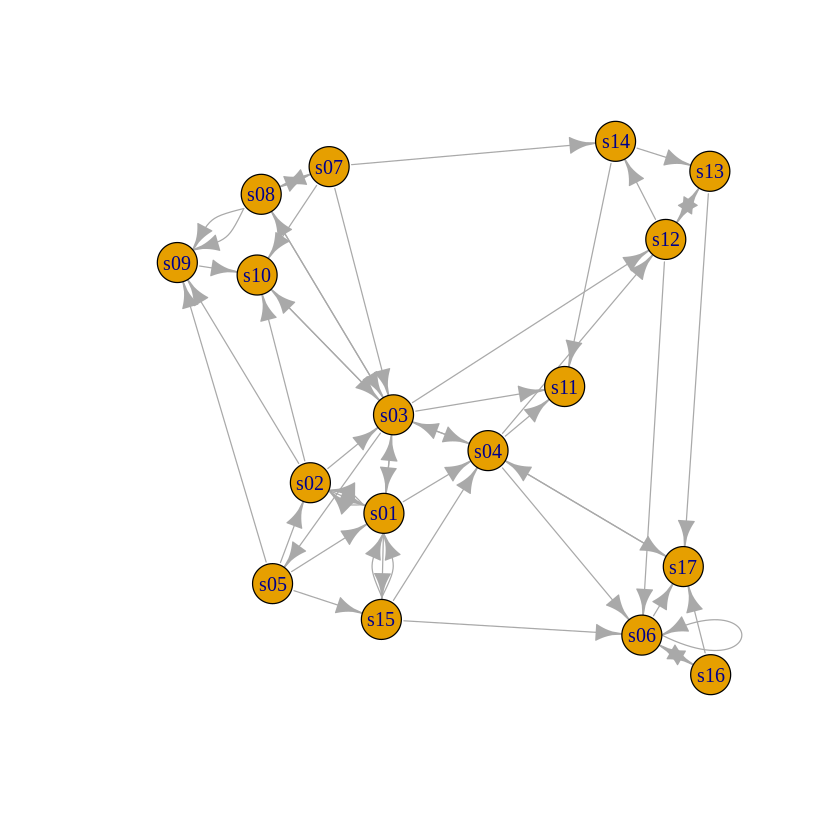

In [74]:
plot(g)